# Institutional DeFi: Arbitrage opportunities of Permissioned and open Uniswap AMMs 

## Research Topic/Question
- a. How would the economic paramaters (price, TVL, trade volume, slippage and impact of time) develop in a replicated DeFi permissioned application vs. permissionless DeFI applications?
    - i. With the example of an AMM protocol
    - ii. How to define the role arbitrageur, which agent can arbitrage accross the white/grey pools
    - iii. Which arbitrage options are possible (same asset, cross asset, cross pool)
- b. Can we derive discussions about the future size of both pools?
    - i. Under what assumptions will the TVL be larger/smaller in permissioned vs permissionless
    - ii. Under what assumptions will the earned Liquidity Provider - LP - fees be larger/smaller

## Pool constraints

- a. Both pools should have 100m from outset
- b. Both pools just 1 trading pair / 2 assets to start with tbd pending data. If we want to open DeFi to TradFi it should be token pair USD/ETH likely in the form of USDC/ETH, USDT/ETH and DEX would be (W)ETH
- c. White pool is constrained KYC/AML, we are not modelling KYC in smart contracts, just stipulating policy that white pool is for KYC’d agents only and from beginning
- d. Agents: 20 agents in grey pool as more diversified retail audience, 10 agents in white pool, 5 agents overlapping both, so total 25 agents.
- e. Trade frequency: Until we have data, we could start out with the white and grey pools are identical, then white pool should be possible to set vs grey pool, say 25/50/75/100/150/200 pct of grey pool trading points
- f. Uniswap v2 convex curve, agent behavior and arbitrage should all follow Angeris/Chitra outline in https://web.stanford.edu/~guillean/papers/uniswap_analysis.pdf, where for reserves of coin a and coin b, denominated Ra and Rb respectively.
     - i. Transactions must satisfy (Ra − ∆a)(Rb + y*∆b) = k
     - ii. Slippage formula inherent in the xy=k model
- g. Time dimension – Block-time is 10 seconds, institutional trade is continuous, this means the data we get will have different timing dimensions in DeFi vs Institutional. Set both pools default to block-time 10 seconds
- h. Trade size – we should be able test different trade sizes and add variation for stochastic simulation. We must also be able to split trades if slippage is too high
- i. The agents include liquidity providers (LP) and traders, who also perform arbitrage between the 2 pools. The more sophisticated arbitraguer agent is not included in first version
- j- Transaction costs:
     - i. Gas fee – set as standard gas fee pending data, independent from the trade size so USD 5 per trade, but model must be able to adjust gas to say 100 USD per trade, so we can model gas fee to go up from beginning.
     - ii. Fixed AMM fee 0,3 pct but allow the model to change from beginning on either pool, so eg white pool can have 0,05 pct and grey is 0,01 pct fee from outset. We will not simulate a variable AMM fee, as we are not designing an AMM incentive mechanism, we are testing a whitelisted Uniswap concept against a grey ditto.


## Model input details
 
The idea is to model institutional investors from traditional finance (TradFi), who face stringent regulatory requirements, with access to decentralized finance (DeFi) protocols using a simple example based on the Uniswap AMM model. The suggested approach will offer private pools of funds where only participants who pass KYC procedures can enter trades. Such an instrument will be considered a complex financial instrument under existing regulation, so not suitable for broader basic retail distribution, but it would be relevant to investigate how to bridge DeFi and TradFi and using cadCAD (more specifically radCAD) as the simulation tool for an institutional offering of AMM.
In terms of any differences between the pools, the working hypothesis is, that participants with access to both the private and public pools could arbitrage the difference.

The methodology for the tests is to create two universes - one for a permissioned AMM and one for a normal/open AMM both based on the Uniswap AMM model - to subsequently be able to represent sequences of arbitrage actions.

Baseline would likely be a micro economic black box model with some simple assumptions around the ecosystem, using a clone of 2 permissionless AMMs and time series to simulate to demonstrate arbitrage conditions, using simple arbitrage strategies, nailing down the intent of arbitrage and informed arbitrage actors vs LPs, leveraging existing academic work on the same. The state of the system should be described by a state map with a set of state variables with the dynamics of the system described by policy functions and state update functions, which are evaluated with cadCAD according to the definitions set in the partial state update blocks.

A simulation configuration is then comprised of a system model and a set of simulation properties, that need to be developed including “what if” scenarios, for example:

- Assuming every price difference will lead to arbitrage, every trading point in permissioned (“white”) pool is then perfectly matched by arbitrageurs with access also to permissionless (“grey”) pool -> both pools are equal and price discovery is the same. So the task is to define assumptions, test assumptions incl fees, slippage, time, rebalancing, Oracle/CEX/DEX influence and other realistic constraints affecting arbitrage as it relates to grey/white pool.
- Simulate results if only 1, 10, 25, 50, 75, 100, 200 pct of trading points in one pool are matched by the other -> ? Investigate/hypothesize under what conditions arbitrageurs will accept KYC “trade-off”, ie is there is demand/supply problem we can solve.
- How long will it take for arbitrageurs to close gaps between the 2 pools, what if the gap is bigger or fee is lower etc. Who will take liquidity from the KYC’d pool, is there an institutional demand what, and what will the supply demand elasticity look like. The grey pool will have more participants and deeper liquidity, what will this look like and how will the white pool evolve via arbitrage.
- Review existing litterature for more advanced arbitrage strategies and test interactions per 1-3) above incl CEX-DEX lessons and possibly the role of order routing services
- Validate findings via interviews with key players
- To be determined if and how to substitute out Uniswap for Balancer for Hydra during project

## Test agents

The first model (KYC - White pool) specifies a number of eight agents that each have their local balances, can interact with the system and are modeled to be responsible for **one action only**. This allows to track for each testcase how the balances will develop and to show independently which events will trigger changes to local and global states. Most importantly directly and indirectly affected variables can be easily identified.

The second model (Grey pool) specifies a number of 20 agents that each have their local balances, can interact with the system and are modeled to be responsible for arbitrage actions. This allows to track for each testcase how the balances will develop and to show independently which events will trigger price deviations to the first pool as wel as arbitrage opportunities in this permissioned pool. The 8 agents from the KYC pool are amongst the 20 agents mentioned here, so they will have positions in both pools.

Two dataframes of agents are initialized identically for both the White and the Grey pool and then work their way through on each side according to the testcase. Afterwards the effects on both sides can be compared.

## Policies and mechanisms

### Assumptions
As the liquidity in the grey pool will develop different to the white pool as trading patterns in teh 2 pools differ, arbitrage opportunities will develop between them. So we need to model the dynamics of both pools for arbitrage opportunities.

KYC-agents are somehow restricted in the white pool in that they have to identifiable, whereas in the grey pool they can remain pseudonymous.

Liquidity Provider (LP) policy 1
   - Let R be the maximum reserve pool that with a daily volume V, Fee F will meet LP annual yield requirement Y, then an LP agent will add/remove liquidity L to either pool based on whether threshold V * 365 * F / R > Y is satisfied.
Must be articulated as 2 policies – one, the liquidity provider agent adds liquidity, the other – liquidity remover, removes liquidity when condition is not met

Liquidity Provider policy 2
   - Every trade incurs a fee of 0,3 pct. This fee is added to the pool as minted UNI tokens, thus increasing “k” in the x*y=k CPMM.
   - Upon an LP wishing to remove liquidity, the relative share of fees earned during the time when providing liquidity are then burnt and distributed to the LP, who is removing liquidity.
   - So, we need a function to distribute evenly to LPs the relatively earned UNI (as a function of all UNI in the pool accumulated continuously) when removing liquidity. The fee would then be the sum over time (t) of 0,3% * V_t * RLP_t / Rtotal_t, where RLP is the LP share of the total reserve of liquidity in the pool, Rtotal  ie the relative share of the pool that earns the fees.

Trader agent policy:
   - White pool – lognormal distribution (always positive number), mean trade size 1 ETH fitted with 5 standard deviations, but minimum 0,04ETH. If possible split orders with same frequency as others if slippage is more than 2 pct, trade frequency 15 trades per minute fitted with 2 standard deviations, timing tbd so trade 24/7 but allow for parametrization.
   - Grey pool – lognormal distribution, mean trade 10 ETH fitted with 5 standard deviations, again minimum 0,04 ETH, if possible split orders with same frequency as others if slippage is more than 2 pct, trade frequency 2 trades per minute with 2 standard deviations, trading 2, timing tbd so trade 24/7 but allow for parametrization.

## Model File Structure

![](https://user-images.githubusercontent.com/70016702/136395115-be8643e2-6038-4a34-8b60-dd5e76095d41.png)

In [1]:
!pip install radcad
!pip install matplotlib
!pip install enforce_typing
!pip install eth_account
!pip install web3
!pip install names

## Run Model



In [1]:
# Dependences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import enforce_typing

# Experiments
from radcad import Model, Simulation, Experiment
from radcad.engine import Engine, Backend

pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

#df = run.run()
#rdf = run.postprocessing(df)
# rdf = df # debugging substeps


In [2]:
from model.state_variables import initial_state
from model.partial_state_update_block import partial_state_update_block
from model.sim_setup import SIMULATION_TIME_STEPS, MONTE_CARLO_RUNS
from model.sys_params import params , initial_values

PoolAgent={name=White Pool, _abc_impl=<_abc_data object at 0x7f9a80810de0>, _pool=UniswapPool:
  name = White pool
  swapFee = 0.30%
  currentTokens (as symbols) = USDC, ETH
  Pair:
  balances:
    USDC: 20000000
    ETH: 10000
    UNI-V2: 447213.5954999579, _wallet=AgentWallet={USD=$0.00; ETH=0.000000 /AgentWallet}, pool=UniswapPool:
  name = White pool
  swapFee = 0.30%
  currentTokens (as symbols) = USDC, ETH
  Pair:
  balances:
    USDC: 20000000
    ETH: 10000
    UNI-V2: 447213.5954999579 /PoolAgent}
PoolAgent={name=Grey Pool, _abc_impl=<_abc_data object at 0x7f9a80810de0>, _pool=UniswapPool:
  name = Grey pool
  swapFee = 0.30%
  currentTokens (as symbols) = USDC, ETH
  Pair:
  balances:
    USDC: 300000000
    ETH: 145000
    UNI-V2: 6595452.9791364595, _wallet=AgentWallet={USD=$0.00; ETH=0.000000 /AgentWallet}, pool=UniswapPool:
  name = Grey pool
  swapFee = 0.30%
  currentTokens (as symbols) = USDC, ETH
  Pair:
  balances:
    USDC: 300000000
    ETH: 145000
    UNI-V2: 6595

In [3]:
model = Model(initial_state=initial_state, state_update_blocks=partial_state_update_block, params=params)
simulation = Simulation(model=model, timesteps=SIMULATION_TIME_STEPS, runs=MONTE_CARLO_RUNS)
experiment = Experiment(simulation)
# Select the Pathos backend to avoid issues with multiprocessing and Jupyter Notebooks
experiment.engine = Engine(backend=Backend.PATHOS, drop_substeps=True)

result = experiment.run()

white_price_usd_to_eth:  0.0005
grey_price_usd_to_eth:  0.00048333333333333334
ratio:  1.0344827586206897
Trade token:  TokenAmount - 
ETH: 50.75000000000001
old_price_ratio:  0.00048333333333333334
new_price_ratio:  0.000483671218197375
Slippage grey:  0.0006985837720527854
Profit:  0.02259189485132266
Trader trades with:  TokenAmount - 
ETH: 50.75000000000001
white_price_usd_to_eth:  0.0005
grey_price_usd_to_eth:  0.000483671218197375
ratio:  1.033760085753049
Trade token:  TokenAmount - 
ETH: 50.76776250000001
old_price_ratio:  0.000483671218197375
new_price_ratio:  0.00048400933926730916
Slippage grey:  0.0006985837720527854
Profit:  0.02187937865466197
Trader trades with:  TokenAmount - 
ETH: 50.76776250000001
white_price_usd_to_eth:  0.0005
grey_price_usd_to_eth:  0.00048400933926730916
ratio:  1.0330379177329458
Trade token:  TokenAmount - 
ETH: 50.78553121687501
old_price_ratio:  0.00048400933926730916
new_price_ratio:  0.00048434769670826073
Slippage grey:  0.00069858377205289

## Interpretation of Results

In [4]:
df = pd.DataFrame(result)
# rdf = df[df['substep'] == df.substep.max()]

In [5]:
df.head(100)

,agents,state,simulation,subset,run,substep,timestep
0,"{'White Pool': PoolAgent={name=White Pool, _ab...",<model.SimState.SimState object at 0x7f9ae0fce...,0,0,1,0,0
1,"{'White Pool': PoolAgent={name=White Pool, _ab...",<model.SimState.SimState object at 0x7f9a80894...,0,0,1,3,1
2,"{'White Pool': PoolAgent={name=White Pool, _ab...",<model.SimState.SimState object at 0x7f9a80899...,0,0,1,3,2
3,"{'White Pool': PoolAgent={name=White Pool, _ab...",<model.SimState.SimState object at 0x7f9a80899...,0,0,1,3,3
4,"{'White Pool': PoolAgent={name=White Pool, _ab...",<model.SimState.SimState object at 0x7f9a808a0...,0,0,1,3,4
...,...,...,...,...,...,...,...
95,"{'White Pool': PoolAgent={name=White Pool, _ab...",<model.SimState.SimState object at 0x7f9ac0b65...,0,0,1,3,95
96,"{'White Pool': PoolAgent={name=White Pool, _ab...",<model.SimState.SimState object at 0x7f9ac0b6a...,0,0,1,3,96
97,"{'White Pool': PoolAgent={name=White Pool, _ab...",<model.SimState.SimState object at 0x7f9ac0b76...,0,0,1,3,97
98,"{'White Pool': PoolAgent={name=White Pool, _ab...",<model.SimState.SimState object at 0x7f9ac0b7c...,0,0,1,3,98


In [6]:
row = df.head(100)
ag = row['state'][90]
print(ag.white_pool_volume_USD)

0.0


/Users/marc/conda/envs/rlcadenv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:613: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f9a9051ca30> has a label of '_USD' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/Users/marc/conda/envs/rlcadenv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:613: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f9a9051c730> has a label of '_ETH' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/Users/marc/conda/envs/rlcadenv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:613: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f9a80d77370> has a label of '_USD' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/Users/marc/conda/envs/rlcadenv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/cor

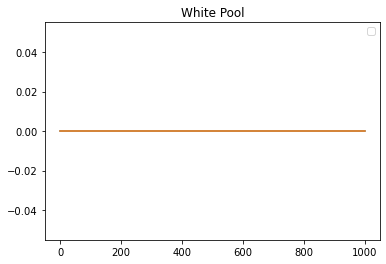

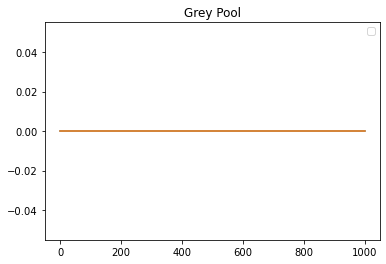

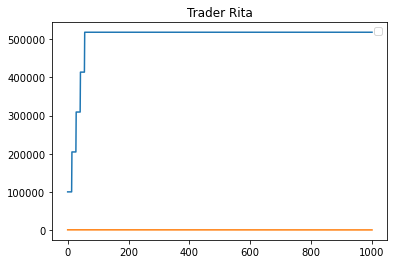

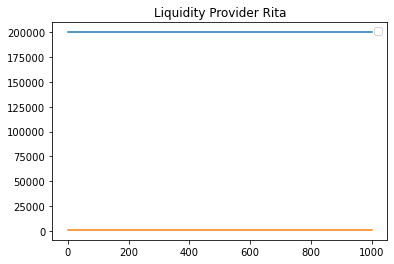

In [7]:
agents_df = df.agents
ldf = pd.concat([agents_df,df.timestep], axis=1)
pdf = ldf.agents.apply(pd.Series)

for column in pdf:
    fields = ['USD', 'ETH']
    df2 = pd.DataFrame([vars(f) for f in pdf[column]])
    df3 = pd.DataFrame([vars(f) for f in df2._wallet])
    df3.plot(title=column)

In [8]:
df_state = pd.DataFrame([vars(f) for f in df.state.to_numpy()])
df_state.tail()
# fields = ['val', 'other_field']
# pd.DataFrame([{fn: getattr(f, fn) for fn in fields} for f in allFoo])
# pd.DataFrame([vars(f) for f in df_state.tokenA.to_numpy()])

,ss,tick,tokenA,tokenB,white_pool_volume_USD,grey_pool_volume_USD,_total_Liq_minted_White,_total_Liq_minted_Grey,_total_Liq_supply_White,_total_Liq_supply_Grey,_total_Liq_burned_White,_total_Liq_burned_Grey,_next_free_marketplace_number,_marketplace_tick_previous_add,_percent_burn,_speculation_valuation,_percent_increase_speculation_valuation_per_s,kpis
96,"SimStrategy={growth_rate_if_0_sales=-0.118, in...",96,<model.parts.agents.web3engine.uniswappool.Tok...,<model.parts.agents.web3engine.uniswappool.Tok...,50080.88,58751.56,119.10,175.88,119.10,175.88,0.00,0.00,0,0,0.05,5000091.33,0.00,<model.Kpis.KPIs object at 0x7fc161039d60>
97,"SimStrategy={growth_rate_if_0_sales=-0.118, in...",97,<model.parts.agents.web3engine.uniswappool.Tok...,<model.parts.agents.web3engine.uniswappool.Tok...,50080.88,58751.56,119.10,175.88,119.10,175.88,0.00,0.00,0,0,0.05,5000092.28,0.00,<model.Kpis.KPIs object at 0x7fc161048d90>
98,"SimStrategy={growth_rate_if_0_sales=-0.118, in...",98,<model.parts.agents.web3engine.uniswappool.Tok...,<model.parts.agents.web3engine.uniswappool.Tok...,50080.88,58751.56,119.10,175.88,119.10,175.88,0.00,0.00,0,0,0.05,5000093.23,0.00,<model.Kpis.KPIs object at 0x7fc161055dc0>
99,"SimStrategy={growth_rate_if_0_sales=-0.118, in...",99,<model.parts.agents.web3engine.uniswappool.Tok...,<model.parts.agents.web3engine.uniswappool.Tok...,50080.88,58751.56,119.10,175.88,119.10,175.88,0.00,0.00,0,0,0.05,5000094.18,0.00,<model.Kpis.KPIs object at 0x7fc161063df0>
100,"SimStrategy={growth_rate_if_0_sales=-0.118, in...",100,<model.parts.agents.web3engine.uniswappool.Tok...,<model.parts.agents.web3engine.uniswappool.Tok...,52104.31,60761.56,119.59,176.06,119.59,176.06,0.00,0.00,0,0,0.05,5000095.13,0.00,<model.Kpis.KPIs object at 0x7fc16106eeb0>


In [9]:
df.tail()

,agents,state,simulation,subset,run,substep,timestep
96,"{'White Pool': PoolAgent={name=White Pool, _ab...",<model.SimState.SimState object at 0x7fc161039...,0,0,1,3,96
97,"{'White Pool': PoolAgent={name=White Pool, _ab...",<model.SimState.SimState object at 0x7fc161048...,0,0,1,3,97
98,"{'White Pool': PoolAgent={name=White Pool, _ab...",<model.SimState.SimState object at 0x7fc161055...,0,0,1,3,98
99,"{'White Pool': PoolAgent={name=White Pool, _ab...",<model.SimState.SimState object at 0x7fc161063...,0,0,1,3,99
100,"{'White Pool': PoolAgent={name=White Pool, _ab...",<model.SimState.SimState object at 0x7fc16106e...,0,0,1,3,100


# Uniswap Universe

## Global State variables for the Uniswap world
## i - Q instance
### Quantities of i-th risk asset, the Q asset and the i-asset shares

The following command lines **create three plots** that show: (for the i-th asset)
- on the left: the quantity of base asset `model_UNI_Qi` 
- center: the quantity of risk asset `model_UNI_Ri` 
- on the right: the quantity of shares `model_UNI_Si`
over all simulation steps

To show other assets the suffix of these commands can be replaced by f.e. `Qj` instead of `Qi`

### Prices of the i-th asset

The following command line creates a plot of the prices: (for the i-th asset)
- the swap price of the risk asset 
- the pool ratio price of the risk asset

Comparison of both plots shows the effects of fees.

For experiments where the price of the asset is affected - for example when it is traded - we expect this price either to rise or fall accordingly. For liquidity adds this price should remain unchanged.

To show other assets the suffix of these commands can be replaced by f.e. `Qj` instead of `Qi`

## j - Q instance
### Quantities of j-th risk asset, the Q asset and the j-asset shares


The following command lines create three plots that show: (for the j-th asset)
- on the left: the quantity of base asset `UNI_Qj` 
- center: the quantity of risk asset `UNI_Rj`
- on the right: the quantity of shares `UNI_Sj`

over the simulation steps

### Prices of the j-th asset

The following command line creates a plot of the prices: (for the j-th asset)
- the swap price of the risk asset 
- the pool ratio price of the risk asset

Comparison of both plots shows the effects of fees.

For experiments where the price of the asset is affected - for example when it is traded - we expect this price either to rise or fall accordingly. For liquidity adds this price should remain unchanged.